In [5]:
!pip install networkx
!pip install scikit learn

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 660.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 2.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 3.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.7 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.4/1.7 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [8]:
!pip install scikit-learn

C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6312224  -1.63119157 -1.63116075 ...  0.89429455 -0.48907234
  0.8037265 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93936983 -0.93936979 -0.93936976 ...  0.55147315 -0.36786356
  1.18758379]' has dtype incompatible with int64, please 

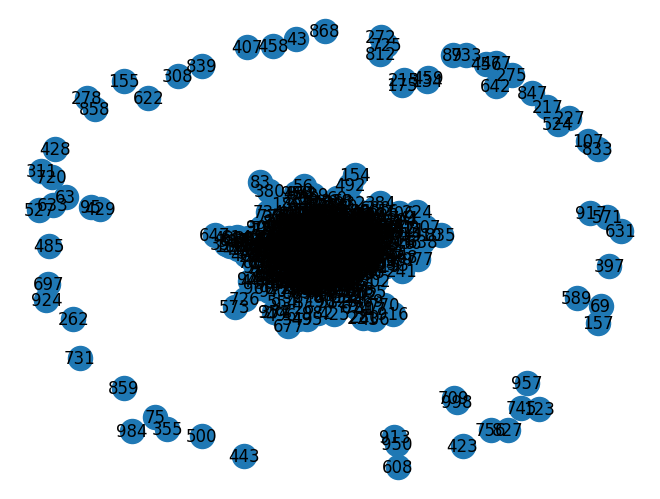

Isolation Forest anomalies: [ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1
  1  1  1  1  1  1  1  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\satwi\Documents\project\Preprocessed_data.csv')

# Feature extraction
features = df[['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 
               'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']]

# Handle categorical features: eth.src, eth.dst, ip.src, ip.dst
label_encoders = {}
categorical_cols = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features.loc[:, col] = label_encoders[col].fit_transform(features.loc[:, col])

# Handle missing values if any
features = features.fillna(method='ffill')  

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['frame.number', 'frame.time', 'frame.len', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']
features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])

# Generate a random wireless network graph
def generate_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Visualize the wireless network graph
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

# Convert the graph to features
def graph_to_features(G):
    num_nodes = G.number_of_nodes()
    feature_matrix = np.zeros((num_nodes, 2))
    for i, node in enumerate(G.nodes()):
        feature_matrix[i] = [nx.degree(G, node), nx.clustering(G, node)]
    return feature_matrix

# Isolation Forest anomaly detection
def isolation_forest_anomaly_detection(features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)  
    clf.fit(features)
    anomalies = clf.predict(features)
    return anomalies

# DBSCAN clustering for anomaly detection
def dbscan_anomaly_detection(features, eps=0.3, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    labels = dbscan.fit_predict(features)
    return labels

# Ensemble method combining DBSCAN and Isolation Forest
def ensemble_anomaly_detection(dbscan_labels, iso_anomalies):
    combined_anomalies = np.where((dbscan_labels == -1) | (iso_anomalies == -1), -1, 1)
    return combined_anomalies

# Example usage
num_nodes = 1000
num_edges = 1500
G = generate_graph(num_nodes, num_edges)
visualize_graph(G)
features = graph_to_features(G)

# Isolation Forest anomaly detection
iso_anomalies = isolation_forest_anomaly_detection(features)
print("Isolation Forest anomalies:", iso_anomalies)

# DBSCAN anomaly detection
dbscan_labels = dbscan_anomaly_detection(features)
print("DBSCAN labels:", dbscan_labels)

# Ensemble anomaly detection
ensemble_anomalies = ensemble_anomaly_detection(dbscan_labels, iso_anomalies)
print("Ensemble Anomalies:", ensemble_anomalies)

# Performance metrics for the ensemble method
true_labels = np.ones(len(features))  # Assuming all instances are initially normal
true_labels[ensemble_anomalies == -1] = -1  # Label anomalies detected by the ensemble method as -1

accuracy = accuracy_score(true_labels, ensemble_anomalies)
precision = precision_score(true_labels, ensemble_anomalies, zero_division=1)
f1 = f1_score(true_labels, ensemble_anomalies, zero_division=1)

print("Ensemble Method Accuracy:", accuracy)
print("Ensemble Method Precision:", precision)
print("Ensemble Method F1 Score:", f1)


C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6312224  -1.63119157 -1.63116075 ...  0.89429455 -0.48907234
  0.8037265 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\3771644354.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93936983 -0.93936979 -0.93936976 ...  0.55147315 -0.36786356
  1.18758379]' has dtype incompatible with int64, please 

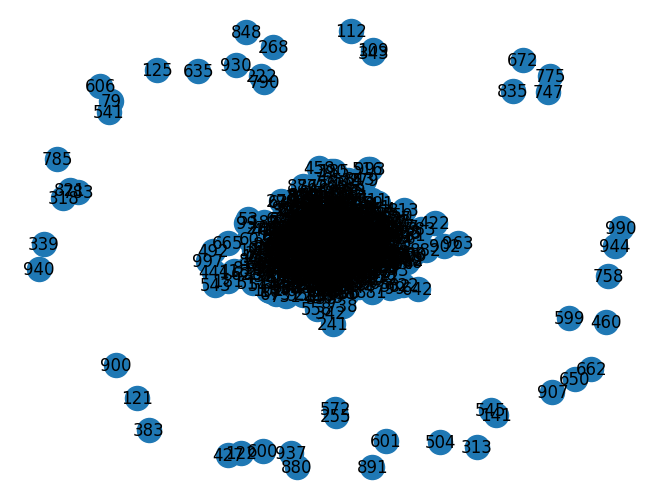

Isolation Forest anomalies: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1 -1  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\satwi\Documents\project\Preprocessed_data.csv')

# Feature extraction
features = df[['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 
               'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']]

# Handle categorical features: eth.src, eth.dst, ip.src, ip.dst
label_encoders = {}
categorical_cols = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features.loc[:, col] = label_encoders[col].fit_transform(features.loc[:, col])

# Handle missing values if any
features = features.fillna(method='ffill')  

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['frame.number', 'frame.time', 'frame.len', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']
features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])

# Generate a random wireless network graph
def generate_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Visualize the wireless network graph
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

# Convert the graph to features
def graph_to_features(G):
    num_nodes = G.number_of_nodes()
    feature_matrix = np.zeros((num_nodes, 2))
    for i, node in enumerate(G.nodes()):
        feature_matrix[i] = [nx.degree(G, node), nx.clustering(G, node)]
    return feature_matrix

# Isolation Forest anomaly detection
def isolation_forest_anomaly_detection(features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)  
    clf.fit(features)
    anomalies = clf.predict(features)
    return anomalies

# DBSCAN clustering for anomaly detection
def dbscan_anomaly_detection(features, eps=0.3, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    labels = dbscan.fit_predict(features)
    return labels

# Ensemble method combining DBSCAN and Isolation Forest
def ensemble_anomaly_detection(dbscan_labels, iso_anomalies):
    combined_anomalies = np.where((dbscan_labels == -1) | (iso_anomalies == -1), -1, 1)
    return combined_anomalies

# Example usage
num_nodes = 1000
num_edges = 1500
G = generate_graph(num_nodes, num_edges)
visualize_graph(G)
features = graph_to_features(G)

# Isolation Forest anomaly detection
iso_anomalies = isolation_forest_anomaly_detection(features)
print("Isolation Forest anomalies:", iso_anomalies)

# DBSCAN anomaly detection
dbscan_labels = dbscan_anomaly_detection(features)
print("DBSCAN labels:", dbscan_labels)

# Ensemble anomaly detection
ensemble_anomalies = ensemble_anomaly_detection(dbscan_labels, iso_anomalies)
print("Ensemble Anomalies:", ensemble_anomalies)

# Performance metrics for the ensemble method
true_labels = np.ones(len(features))  # Assuming all instances are initially normal
true_labels[ensemble_anomalies == -1] = -1  # Label anomalies detected by the ensemble method as -1

accuracy = accuracy_score(true_labels, ensemble_anomalies)
precision = precision_score(true_labels, ensemble_anomalies, zero_division=1)
f1 = f1_score(true_labels, ensemble_anomalies, zero_division=1)

print("Ensemble Method Accuracy:", accuracy)
print("Ensemble Method Precision:", precision)
print("Ensemble Method F1 Score:", f1)


C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\2262829325.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\2262829325.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6312224  -1.63119157 -1.63116075 ...  0.89429455 -0.48907234
  0.8037265 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])
C:\Users\satwi\AppData\Local\Temp\ipykernel_19108\2262829325.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93936983 -0.93936979 -0.93936976 ...  0.55147315 -0.36786356
  1.18758379]' has dtype incompatible with int64, please 

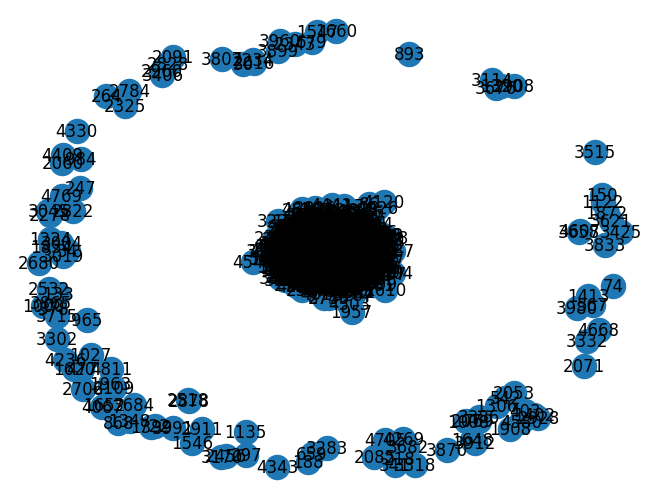

Isolation Forest anomalies: [-1  1  1 ...  1  1  1]
DBSCAN labels: [0 1 2 ... 7 2 7]
Ensemble Anomalies: [-1  1  1 ...  1  1  1]
Ensemble Method Accuracy: 1.0
Ensemble Method Precision: 1.0
Ensemble Method F1 Score: 1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\satwi\Documents\project\Preprocessed_data.csv')

# Feature extraction
features = df[['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 
               'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']]

# Handle categorical features: eth.src, eth.dst, ip.src, ip.dst
label_encoders = {}
categorical_cols = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features.loc[:, col] = label_encoders[col].fit_transform(features.loc[:, col])

# Handle missing values if any
features = features.fillna(method='ffill')  

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['frame.number', 'frame.time', 'frame.len', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']
features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])

# Generate a random wireless network graph
def generate_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Visualize the wireless network graph
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

# Convert the graph to features
def graph_to_features(G):
    num_nodes = G.number_of_nodes()
    feature_matrix = np.zeros((num_nodes, 2))
    for i, node in enumerate(G.nodes()):
        feature_matrix[i] = [nx.degree(G, node), nx.clustering(G, node)]
    return feature_matrix

# Isolation Forest anomaly detection
def isolation_forest_anomaly_detection(features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)  
    clf.fit(features)
    anomalies = clf.predict(features)
    return anomalies

# DBSCAN clustering for anomaly detection
def dbscan_anomaly_detection(features, eps=0.3, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    labels = dbscan.fit_predict(features)
    return labels

# Ensemble method combining DBSCAN and Isolation Forest
def ensemble_anomaly_detection(dbscan_labels, iso_anomalies):
    combined_anomalies = np.where((dbscan_labels == -1) | (iso_anomalies == -1), -1, 1)
    return combined_anomalies

# Example usage
num_nodes = 5000
num_edges = 10000
G = generate_graph(num_nodes, num_edges)
visualize_graph(G)
features = graph_to_features(G)

# Isolation Forest anomaly detection
iso_anomalies = isolation_forest_anomaly_detection(features)
print("Isolation Forest anomalies:", iso_anomalies)

# DBSCAN anomaly detection
dbscan_labels = dbscan_anomaly_detection(features)
print("DBSCAN labels:", dbscan_labels)

# Ensemble anomaly detection
ensemble_anomalies = ensemble_anomaly_detection(dbscan_labels, iso_anomalies)
print("Ensemble Anomalies:", ensemble_anomalies)

# Performance metrics for the ensemble method
true_labels = np.ones(len(features))  # Assuming all instances are initially normal
true_labels[ensemble_anomalies == -1] = -1  # Label anomalies detected by the ensemble method as -1

accuracy = accuracy_score(true_labels, ensemble_anomalies)
precision = precision_score(true_labels, ensemble_anomalies, zero_division=1)
f1 = f1_score(true_labels, ensemble_anomalies, zero_division=1)

print("Ensemble Method Accuracy:", accuracy)
print("Ensemble Method Precision:", precision)
print("Ensemble Method F1 Score:", f1)


C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\1025597900.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')
C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\1025597900.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6312224  -1.63119157 -1.63116075 ...  0.89429455 -0.48907234
  0.8037265 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])
C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\1025597900.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93936983 -0.93936979 -0.93936976 ...  0.55147315 -0.36786356
  1.18758379]' has dtype incompatible with int64, please exp

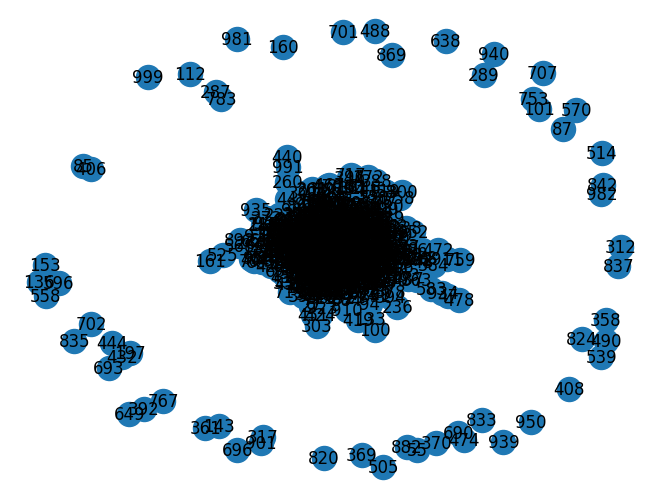

Isolation Forest anomalies: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\satwi\Documents\project\Preprocessed_data.csv')

# Feature extraction
features = df[['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 
               'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']]

# Handle categorical features: eth.src, eth.dst, ip.src, ip.dst
label_encoders = {}
categorical_cols = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features.loc[:, col] = label_encoders[col].fit_transform(features.loc[:, col])

# Handle missing values if any
features = features.fillna(method='ffill')  

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['frame.number', 'frame.time', 'frame.len', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']
features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])

# Generate a random wireless network graph
def generate_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Visualize the wireless network graph
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

# Convert the graph to features
def graph_to_features(G):
    num_nodes = G.number_of_nodes()
    feature_matrix = np.zeros((num_nodes, 2))
    for i, node in enumerate(G.nodes()):
        feature_matrix[i] = [nx.degree(G, node), nx.clustering(G, node)]
    return feature_matrix

# Isolation Forest anomaly detection
def isolation_forest_anomaly_detection(features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)  
    clf.fit(features)
    anomalies = clf.predict(features)
    return anomalies

# DBSCAN clustering for anomaly detection
def dbscan_anomaly_detection(features, eps=0.3, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    labels = dbscan.fit_predict(features)
    return labels

# Ensemble method combining DBSCAN and Isolation Forest
def ensemble_anomaly_detection(dbscan_labels, iso_anomalies):
    combined_anomalies = np.where((dbscan_labels == -1) | (iso_anomalies == -1), -1, 1)
    return combined_anomalies

# Example usage
num_nodes = 1000
num_edges = 1500
G = generate_graph(num_nodes, num_edges)
visualize_graph(G)
features = graph_to_features(G)

# Isolation Forest anomaly detection
iso_anomalies = isolation_forest_anomaly_detection(features)
print("Isolation Forest anomalies:", iso_anomalies)

# DBSCAN anomaly detection
dbscan_labels = dbscan_anomaly_detection(features)
print("DBSCAN labels:", dbscan_labels)

# Ensemble anomaly detection
ensemble_anomalies = ensemble_anomaly_detection(dbscan_labels, iso_anomalies)
print("Ensemble Anomalies:", ensemble_anomalies)

# Performance metrics for the ensemble method
true_labels = np.ones(len(features))  # Assuming all instances are initially normal
true_labels[ensemble_anomalies == -1] = -1  # Label anomalies detected by the ensemble method as -1

accuracy = accuracy_score(true_labels, ensemble_anomalies)
precision = precision_score(true_labels, ensemble_anomalies, zero_division=1)
recall = recall_score(true_labels, ensemble_anomalies, zero_division=1)
f1 = f1_score(true_labels, ensemble_anomalies, zero_division=1)

print("Ensemble Method Accuracy:", accuracy)
print("Ensemble Method Precision:", precision)
print("Ensemble Method Recall:", recall)
print("Ensemble Method F1 Score:", f1)


C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\68131271.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')
C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\68131271.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6312224  -1.63119157 -1.63116075 ...  0.89429455 -0.48907234
  0.8037265 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])
C:\Users\satwi\AppData\Local\Temp\ipykernel_3576\68131271.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.93936983 -0.93936979 -0.93936976 ...  0.55147315 -0.36786356
  1.18758379]' has dtype incompatible with int64, please explicitl

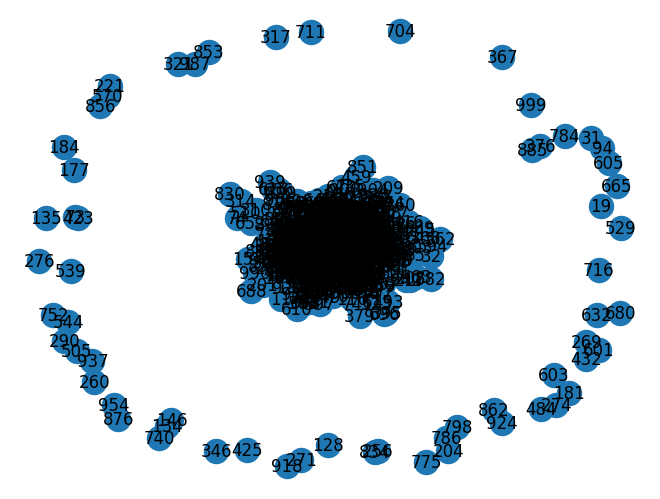

Isolation Forest anomalies: [ 1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r'C:\Users\satwi\Documents\project\Preprocessed_data.csv')

# Feature extraction
features = df[['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst', 
               'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']]

# Handle categorical features: eth.src, eth.dst, ip.src, ip.dst
label_encoders = {}
categorical_cols = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    features.loc[:, col] = label_encoders[col].fit_transform(features.loc[:, col])

# Handle missing values if any
features = features.fillna(method='ffill')  

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['frame.number', 'frame.time', 'frame.len', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport']
features.loc[:, numerical_cols] = scaler.fit_transform(features.loc[:, numerical_cols])

# Generate a random wireless network graph
def generate_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Visualize the wireless network graph
def visualize_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

# Convert the graph to features
def graph_to_features(G):
    num_nodes = G.number_of_nodes()
    feature_matrix = np.zeros((num_nodes, 2))
    for i, node in enumerate(G.nodes()):
        feature_matrix[i] = [nx.degree(G, node), nx.clustering(G, node)]
    return feature_matrix

# Isolation Forest anomaly detection
def isolation_forest_anomaly_detection(features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)  
    clf.fit(features)
    anomalies = clf.predict(features)
    return anomalies

# DBSCAN clustering for anomaly detection
def dbscan_anomaly_detection(features, eps=0.3, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
    labels = dbscan.fit_predict(features)
    return labels

# Ensemble method combining DBSCAN and Isolation Forest
def ensemble_anomaly_detection(dbscan_labels, iso_anomalies):
    combined_anomalies = np.where((dbscan_labels == -1) | (iso_anomalies == -1), -1, 1)
    return combined_anomalies

# Example usage
num_nodes = 1000
num_edges = 1500
G = generate_graph(num_nodes, num_edges)
visualize_graph(G)
features = graph_to_features(G)

# Isolation Forest anomaly detection
iso_anomalies = isolation_forest_anomaly_detection(features)
print("Isolation Forest anomalies:", iso_anomalies)

# DBSCAN anomaly detection
dbscan_labels = dbscan_anomaly_detection(features)
print("DBSCAN labels:", dbscan_labels)

# Ensemble anomaly detection
ensemble_anomalies = ensemble_anomaly_detection(dbscan_labels, iso_anomalies)
print("Ensemble Anomalies:", ensemble_anomalies)

# Performance metrics for the ensemble method
true_labels = np.ones(len(features))  # Assuming all instances are initially normal
true_labels[ensemble_anomalies == -1] = -1  # Label anomalies detected by the ensemble method as -1

accuracy = accuracy_score(true_labels, ensemble_anomalies)
precision = precision_score(true_labels, ensemble_anomalies, zero_division=1)
recall = recall_score(true_labels, ensemble_anomalies, zero_division=1)
f1 = f1_score(true_labels, ensemble_anomalies, zero_division=1)

# Calculate confusion matrix for additional metrics
tn, fp, fn, tp = confusion_matrix(true_labels, ensemble_anomalies).ravel()
sensitivity = recall  # Sensitivity is the same as recall
specificity = tn / (tn + fp)
error_rate = (fp + fn) / (tn + fp + fn + tp)

print("Ensemble Method Accuracy:", accuracy)
print("Ensemble Method Precision:", precision)
print("Ensemble Method Recall (Sensitivity):", recall)
print("Ensemble Method F1 Score:", f1)
print("Ensemble Method Specificity:", specificity)
print("Ensemble Method Error Rate:", error_rate)
